# COMP4102A Assignment 2 (Starter Code)
Use this starter code for Assignment 2

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
torch.cuda.is_available()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN Class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Step 1: Create the first convolutional layer (conv1)
        #   - Input channels: 3
        #   - Output channels: 6
        #   - Kernel size: 5
        self.conv1 = nn.Conv2d(3, 6, 5)

        # Step 2: Create max pooling layer (pool)
        #   - Kernel size: 2
        #   - Stride: 2
        self.pool = nn.MaxPool2d(2, 2)
        # Step 3: Create the second convolutional layer (conv2)
        #   - Input channels: 6
        #   - Output channels: 16
        #   - Kernel size: 5
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Step 4: Create the first fully connected layer (fc1)
        #   - Input features: 16 * 5 * 5
        #   - Output features: 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        # Step 5: Create the second fully connected layer (fc2)
        #   - Input features: 120
        #   - Output features: 120
        self.fc2 = nn.Linear(120, 120)

        # Step 6: Create the third fully connected layer (fc3)
        #   - Input features: 120
        #   - Output features: 10 (number of classes in CIFAR-10)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        # Step 7: Define the forward pass
        #   - Apply conv1, followed by ReLU activation and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        #   - Apply conv2, followed by ReLU activation and max pooling
        x = self.pool(F.relu(self.conv2(x)))
        #   - Reshape the tensor for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        #   - Apply fc1, followed by ReLU activation
        x = F.relu(self.fc1(x))
        #   - Apply fc2, followed by ReLU activation
        x = F.relu(self.fc2(x))
        #   - Apply fc3 (output layer)
        x = self.fc3(x)
        #   - Return output
        return x 
print(Net()) 

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [6]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN Class
class SigmoidNet(nn.Module):
    def __init__(self):
        super(SigmoidNet, self).__init__()

        # Step 1: Create the first convolutional layer (conv1)
        #   - Input channels: 3
        #   - Output channels: 6
        #   - Kernel size: 5
        self.conv1 = nn.Conv2d(3, 6, 5)

        # Step 2: Create max pooling layer (pool)
        #   - Kernel size: 2
        #   - Stride: 2
        self.pool = nn.MaxPool2d(2, 2)
        # Step 3: Create the second convolutional layer (conv2)
        #   - Input channels: 6
        #   - Output channels: 16
        #   - Kernel size: 5
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Step 4: Create the first fully connected layer (fc1)
        #   - Input features: 16 * 5 * 5
        #   - Output features: 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        # Step 5: Create the second fully connected layer (fc2)
        #   - Input features: 120
        #   - Output features: 120
        self.fc2 = nn.Linear(120, 120)

        # Step 6: Create the third fully connected layer (fc3)
        #   - Input features: 120
        #   - Output features: 10 (number of classes in CIFAR-10)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        # Step 7: Define the forward pass
        #   - Apply conv1, followed by ReLU activation and max pooling
        x = self.pool(F.sigmoid(self.conv1(x)))
        #   - Apply conv2, followed by ReLU activation and max pooling
        x = self.pool(F.sigmoid(self.conv2(x)))
        #   - Reshape the tensor for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        #   - Apply fc1, followed by ReLU activation
        x = F.sigmoid(self.fc1(x))
        #   - Apply fc2, followed by ReLU activation
        x = F.sigmoid(self.fc2(x))
        #   - Apply fc3 (output layer)
        x = self.fc3(x)
        #   - Return output
        return x 
print(SigmoidNet()) 

SigmoidNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [7]:
import torch.optim as optim
net=Net()
CUDA=torch.cuda.is_available()
if CUDA:
  net=net.cuda()

# Let's first define our device as the first visible cuda device if we have
# CUDA available:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

#In Colab, got to Edit>Notebook settings> choose Python 3. For the hardware
#accelerator, you may select None or GPU.


cpu


In [8]:
# 4. Train the network
def network_training(net): 
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
  accuracy_values=[]
  epoch_number=[]
  for epoch in range(10):  # loop over the dataset multiple times. Here 10 means 10 epochs
      running_loss = 0.0
      for i, (inputs,labels) in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
          else:
            inputs = inputs.cpu()
            labels = labels.cpu()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print('[epoch%d, itr%5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0

      correct = 0
      total = 0
      with torch.no_grad():
          for images, labels in testloader:
              if CUDA:
                images = images.cuda()
                labels = labels.cuda()
              else:
                images = images.cpu()
                labels =labels.cpu()

              outputs = net(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              if CUDA:
                correct += (predicted.cpu()==labels.cpu()).sum().item()
              else:
                correct += (predicted==labels).sum().item()

          TestAccuracy = 100 * correct / total;
          epoch_number += [epoch+1]
          accuracy_values += [TestAccuracy]
          print('Epoch=%d Test Accuracy=%.3f' %
                    (epoch + 1, TestAccuracy))

  print('Finished Training')
  return accuracy_values, epoch_number

[epoch1, itr 2000] loss: 2.205
[epoch1, itr 4000] loss: 1.831
[epoch1, itr 6000] loss: 1.657
[epoch1, itr 8000] loss: 1.548
[epoch1, itr10000] loss: 1.505
[epoch1, itr12000] loss: 1.454
Epoch=1 Test Accuracy=49.520
[epoch2, itr 2000] loss: 1.372
[epoch2, itr 4000] loss: 1.344
[epoch2, itr 6000] loss: 1.313
[epoch2, itr 8000] loss: 1.288
[epoch2, itr10000] loss: 1.284
[epoch2, itr12000] loss: 1.250
Epoch=2 Test Accuracy=57.010
[epoch3, itr 2000] loss: 1.172
[epoch3, itr 4000] loss: 1.180
[epoch3, itr 6000] loss: 1.161
[epoch3, itr 8000] loss: 1.179
[epoch3, itr10000] loss: 1.175
[epoch3, itr12000] loss: 1.153
Epoch=3 Test Accuracy=56.790
[epoch4, itr 2000] loss: 1.056
[epoch4, itr 4000] loss: 1.084
[epoch4, itr 6000] loss: 1.099
[epoch4, itr 8000] loss: 1.085
[epoch4, itr10000] loss: 1.084
[epoch4, itr12000] loss: 1.076
Epoch=4 Test Accuracy=60.890
[epoch5, itr 2000] loss: 1.007
[epoch5, itr 4000] loss: 1.009
[epoch5, itr 6000] loss: 1.003
[epoch5, itr 8000] loss: 1.026
[epoch5, itr1000

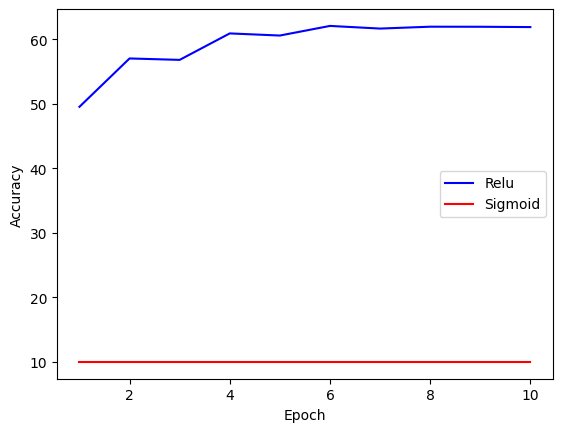

In [9]:
import matplotlib.pyplot as plt
import numpy as np

nets = [Net(), SigmoidNet()]
names = ["Relu", "Sigmoid"]
colors = ["blue", "red"]

for net, name, color in zip(nets, names, colors):
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
    accuracy_values, epoch_number = network_training(net)
    # Plot the data
    plt.plot(epoch_number, accuracy_values, color=color, label=name)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Anything better than 10% accuracy (randomly picking a class out of 10 classes)
# means the network has learned something.

#Additional code to explore the dataset and the trained model

torch.Size([4, 3, 32, 32])


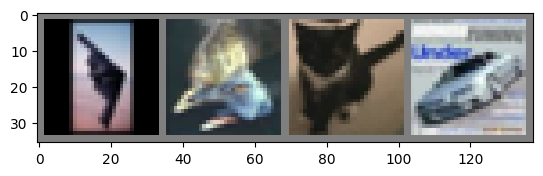

plane  bird   cat   car


In [10]:
# Show some random training images

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

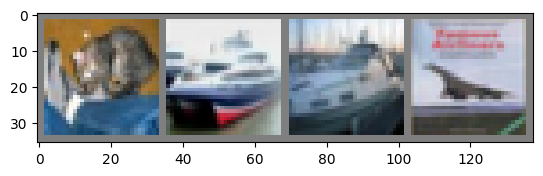

GroundTruth:    cat  ship  ship plane
Predicted:  truck truck truck truck


In [11]:
# Test the network on some test images

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
if CUDA:
  images = images.cuda()
  labels = labels.cuda()
else:
  images = images.cpu()
  labels =labels.cpu()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [12]:
# Lets check what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in testloader:
        if CUDA:
          images =images.cuda()
          labels =labels.cuda()
        else:
          images =images.cpu()
          labels =labels.cpu()

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck : 100 %
